<a href="https://colab.research.google.com/github/rutujahingankar/nyc-taxi-trip-time-prediction/blob/main/individual_notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

#Loading Dataset

In [ ]:
#importing required packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading dataset
df= pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
nyc_taxi_df = df.drop(['id','pickup_datetime','dropoff_datetime','Dropoff_timezone','Pickup_timezone','store_and_fwd_flag','pickup_day','dropoff_day'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_weekday_num,month,pickup_hour,dropoff_hour,haversine_distance,manhattan_distance,avg_speed_h,avg_speed_m,pickup_holidays,pickup_near_holiday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,3,17,17,1.498521,1.735433,11.856428,13.730901,0,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,6,0,0,1.805507,2.430506,9.803659,13.197318,0,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,1,11,12,6.385098,8.203575,10.822201,13.904365,0,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,2,4,19,19,1.485498,1.661331,12.465721,13.941241,0,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,5,3,13,13,1.188588,1.199457,9.836594,9.926539,0,0


* Let us remove the columns which are not important for further analysis.
* Features such as id, timestamp and weekday were not assigned to X array because they are of type object. And we need an array of float data type for further analysis.

# Normalization
 * It is suggested to scale the input varibles to standardise the variance and avoid the bias. 



In [ ]:
X = nyc_taxi_df .drop(['trip_duration'], axis=1)
y = np.log(df['trip_duration']).values

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.

scaler=StandardScaler()
scaler.fit(X)
scaler_data = scaler.transform(X)
new_df=pd.DataFrame(scaler_data)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-1.561062,-0.307440,0.530263,0.524563,-0.452072,-0.478549,-0.171376,-0.243832,-0.137979,-0.192191
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,1.509502,1.477173,-2.126116,-2.097405,-0.380622,-0.355874,-0.308432,-0.270283,-0.137979,-0.192191
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-1.049301,-1.497182,-0.407283,-0.246604,0.685258,0.663036,-0.240428,-0.235233,-0.137979,5.203170
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.537541,0.287431,0.842778,0.833030,-0.455103,-0.491628,-0.130695,-0.233405,-0.137979,-0.192191
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,0.997741,-0.307440,-0.094768,-0.092371,-0.524207,-0.573146,-0.306233,-0.432422,-0.137979,-0.192191


* Above , we had considered 17 as a required number of components and extracted new features by transforming the Data.


# Building Model
* We need a model to train on our dataset to serve our purpose of prediciting the NYC taxi trip duration given the other features as training and test set. Since our dependent variable contains continous values so we will use regression technique to predict our output



# Splitting the data in train and test sets
* To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).

In [ ]:
X=new_df
y= np.log(nyc_taxi_df['trip_duration']).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1021050, 16), (437594, 16), (1021050,), (437594,))

#Linear Regression

In [ ]:
#Importing Linear Regression
regressor = LinearRegression()
y_=regressor.fit(X_train, y_train)
#Making prediction
y_pred = regressor.predict(X_test)
y_pred

array([6.25852354, 6.72906906, 6.1101255 , ..., 6.41059273, 6.66540026,
       6.5148183 ])

In [ ]:
regressor.intercept_, regressor.coef_

(6.464340646637436,
 array([ 9.92916200e-03,  7.88872099e-03, -8.33948837e-02,  3.17945959e-02,
         5.48857197e-02, -3.28798634e-02, -1.44250684e-02,  1.78608149e-02,
         5.33716130e-04,  2.41044575e-02,  2.80404235e+00, -2.15284499e+00,
        -2.56509316e+00,  2.26364317e+00, -1.68334612e-02, -6.01895415e-03]))

**Model** **Evaluation**

In [ ]:
#Evaluate the regressor on the Feature selection group
t_lgt= regressor.score(X_train, y_train)
print ("Training Score : " , t_lgt)

v_lgt=regressor.score(X_test, y_test)
print ("Validation Score : ", v_lgt)

cv_lgt=cross_val_score(regressor, X_train, y_train, cv=5).mean()
print ("Cross Validation Score : " , cv_lgt)

r2_lgt=  r2_score( y_test, y_pred)
print ("R2_Score : ",r2_lgt)

rmse_lgt=np.sqrt(mean_squared_error(y_test, y_pred))
print ("RMSE :",rmse_lgt)

Training Score :  0.48565837175003357
Validation Score :  0.49097250892167243
Cross Validation Score :  0.40892962713859154
R2_Score :  0.49097250892167243
RMSE : 0.5693808013118592


In [ ]:
from sklearn.metrics import mean_squared_log_error
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.11464018891653321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Test VS Prediction')

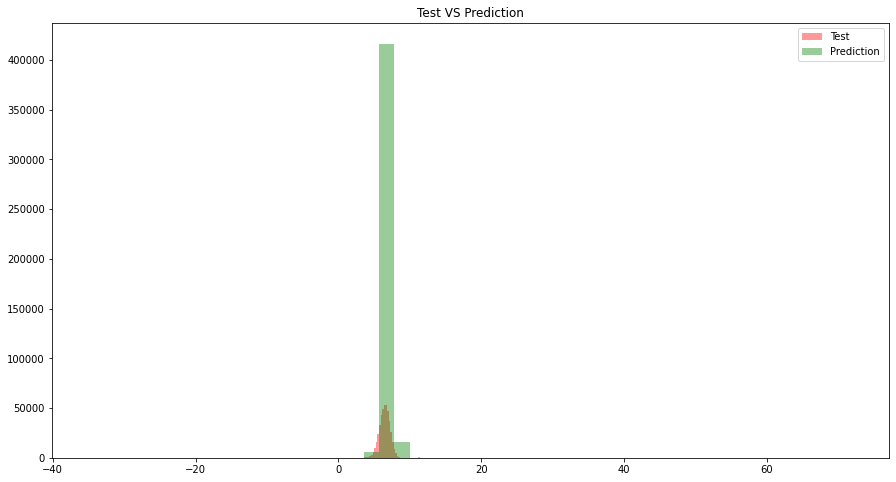

In [ ]:
#prediction vs real data
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="r", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in red) and Predicted values (in green) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

* Let's see if we can improve this further with the other algorigthm 

#Decision Tree

In [ ]:
R_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
R_dt.fit(X_train, y_train)
dt_pred = R_dt.predict(X_test)
dt_pred

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([6.47418433, 7.58509926, 6.21304216, ..., 7.06029736, 7.57652488,
       6.56443524])

In [ ]:
#examining metrics
t_dt= R_dt.score(X_train, y_train)
print ("Training Score : " ,t_dt)

v_dt= R_dt.score(X_test, y_test)
print ("Validation Score : ", R_dt.score(X_test, y_test))

cv_dt= cross_val_score(R_dt, X_train, y_train, cv=5).mean()
print ("Cross Validation Score : " , cv_dt)

r2_dt=r2_score( y_test, dt_pred)
print ("R2_Score : ", r2_dt)

rmse_dt=np.sqrt(mean_squared_error(y_test, dt_pred))
print ("RMSE :" ,rmse_dt)

rmsl_=np.sqrt(mean_squared_log_error(dt_pred, y_test))
print ("RMSLE : ",rmsl_)

Training Score :  0.9762168380763555
Validation Score :  0.9754015891450172


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

Cross Validation Score :  0.9751568529080193
R2_Score :  0.9754015891450172
RMSE : 0.12516581335010787
RMSLE :  0.024213628193141285


In [ ]:
print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

RMSLE :  0.024213628193141285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Test VS Prediction')

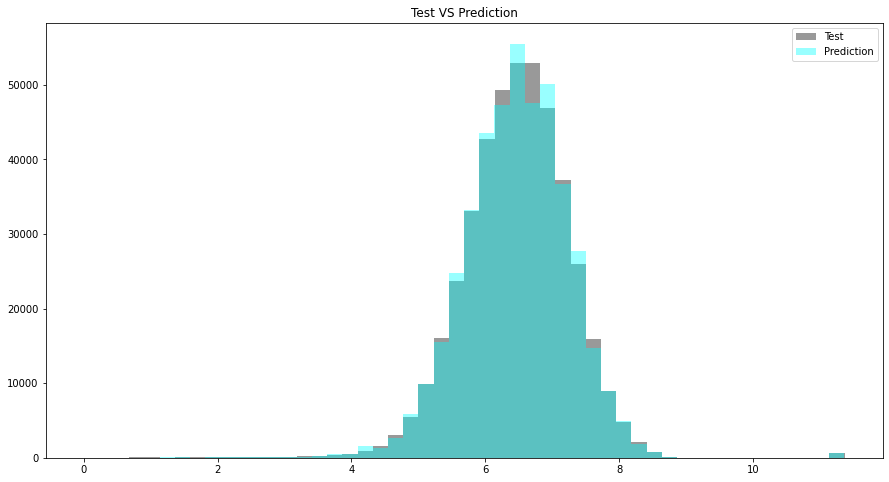

In [ ]:
#prediction vs real data
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* There is approx 200% improvement on the R2 score for the Decision tree regressor over the Linear regressor of the feature selection group.
* From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction but 

* Let's see if we can improve this further with the other algorigthm.

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([6.48481086, 7.53135161, 6.19754512, ..., 7.07843563, 7.60757225,
       6.56952434])

Model Evaluation



In [ ]:
#examining metrics
t_rf=est_rf.score(X_train, y_train)
print ("Training Score : " , t_rf)

v_rf=est_rf.score(X_test, y_test)
print ("Validation Score : ", v_rf)

cv_rf=cross_val_score(est_rf, X_train, y_train, cv=5).mean()
print ("Cross Validation Score : " , cv_rf)

r2_rf=r2_score(rf_pred, y_test)
print ("R2_Score : ", r2_rf)

rmse_rf=np.sqrt(mean_squared_error(y_test, rf_pred))
print ("RMSE :" ,rmse_rf)

rmsle_rf=np.sqrt(mean_squared_log_error(rf_pred, y_test))
print ("RMSLE : ", rmsle_rf)

Training Score :  0.9800486841745676
Validation Score :  0.9794268440323047


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Cross Validation Score :  0.9791267810399468
R2_Score :  0.9788385653752051
RMSE : 0.11446762170820399
RMSLE :  0.022953491674509698


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Test VS Prediction')

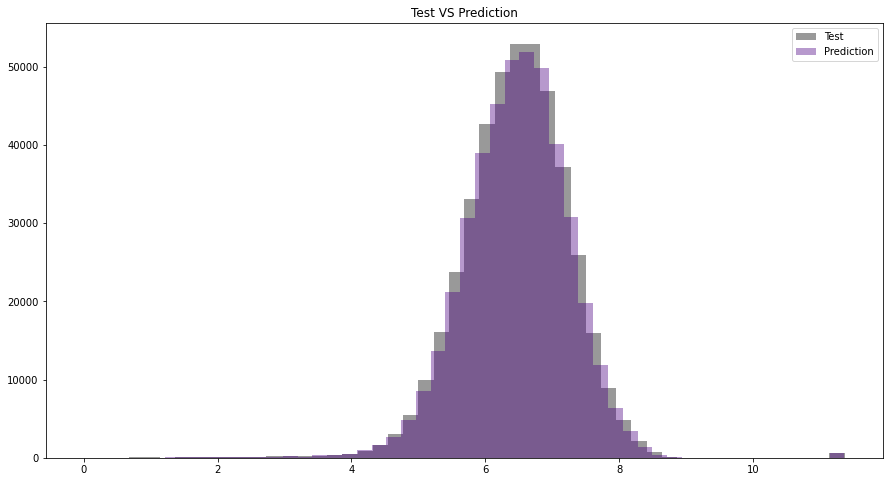

In [ ]:
#prediction vs real data
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* From the above Viz. we can clearly identify that the Random Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in purple) are as close as possible. We can conclude that random forest could be a good choice for Trip duration prediction.
* The performance of Random Forest is also better than Linear regressor and somewhat similar to the decision tree but There is slight difference in r2 score and rmsle value.

# CONCLUSION ON MODEL TRAINING
* At the end we conclude our project with 3 models namely Linear Regression, Decision Tree and Random Forest.
* Decision Tree and Random Forest both model giving us a good score but One problem that might occur with Decision Tree is that it can overfit.
* It gets overfitted on training data which couldn't predict well on unseen data.
* A random forest chooses few number of rows at random and interprets results from all the Tress and combines it to get more accurate and stable final result.
* Among this Random Forest performs the best on our dataset as we saw that the RMSLE values came out to be the least for the same.